In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


## Question 1 & 2

- Given a dataset with time series data containing an event, use a linear regression to test whether there was a discontinuity in the data at the event. Consider the possibility, first, of a discontinuity only in the value of the variable but not the derivative. Then consider that there may be a discontinuity in the first derivative (the slope).  
- Use the file homework_3.1.csv. 

In [8]:
df_3_1 = pd.read_csv('homework_3.1.csv')

In [9]:
df_3_1['event'] = (df_3_1['time'] >= 50).astype(int)

# Function to test discontinuity in value
def test_discontinuity(df, column):
    X = pd.DataFrame({
        'time': df['time'],
        'event': df['event']
    })
    X = sm.add_constant(X)
    y = df[column]
    
    model = sm.OLS(y, X).fit()
    print(f"\nDiscontinuity test for {column}:")
    print(model.summary())


for col in ['value1', 'value2', 'value3']:
    test_discontinuity(df_3_1, col)


Discontinuity test for value1:
                            OLS Regression Results                            
Dep. Variable:                 value1   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     90.57
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           6.48e-23
Time:                        13:11:42   Log-Likelihood:                -160.63
No. Observations:                 100   AIC:                             327.3
Df Residuals:                      97   BIC:                             335.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.443

In [10]:
def test_derivative_discontinuity(df, column):
    df['interaction'] = df['time'] * df['event']
    X = pd.DataFrame({
        'const': 1,
        'time': df['time'],
        'event': df['event'],
        'interaction': df['interaction']
    })
    y = df[column]
    
    model = sm.OLS(y, X).fit()
    print(f"\nDerivative discontinuity test for {column}:")
    print(model.summary())

for col in ['value1', 'value2', 'value3']:
    test_derivative_discontinuity(df_3_1, col)



Derivative discontinuity test for value1:
                            OLS Regression Results                            
Dep. Variable:                 value1   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     120.2
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           2.18e-32
Time:                        13:11:42   Log-Likelihood:                -135.33
No. Observations:                 100   AIC:                             278.7
Df Residuals:                      96   BIC:                             289.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const  

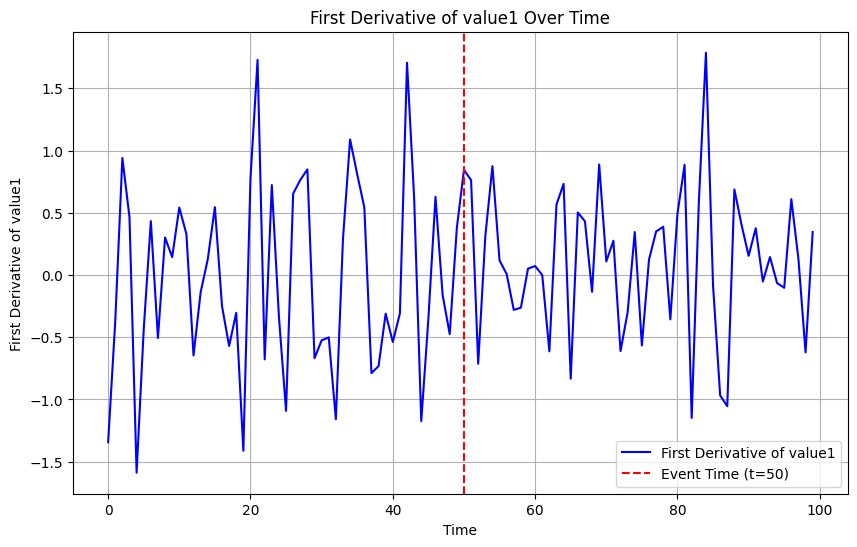

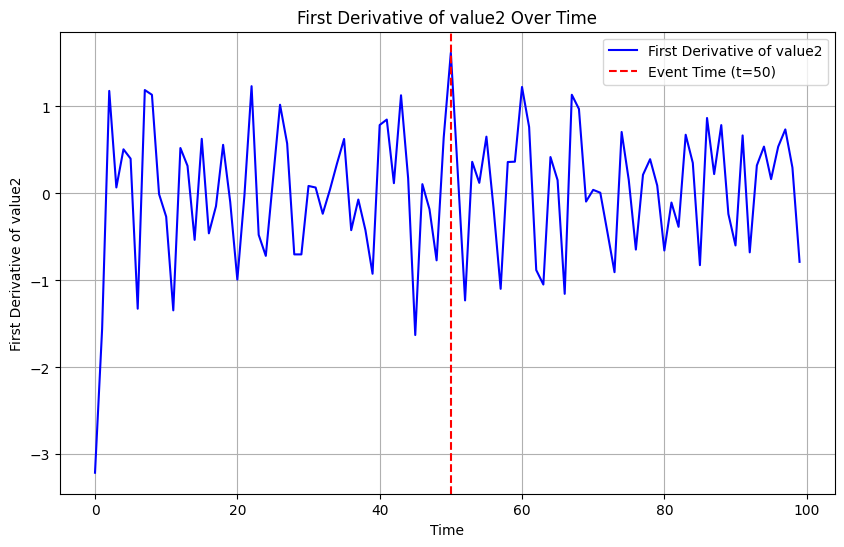

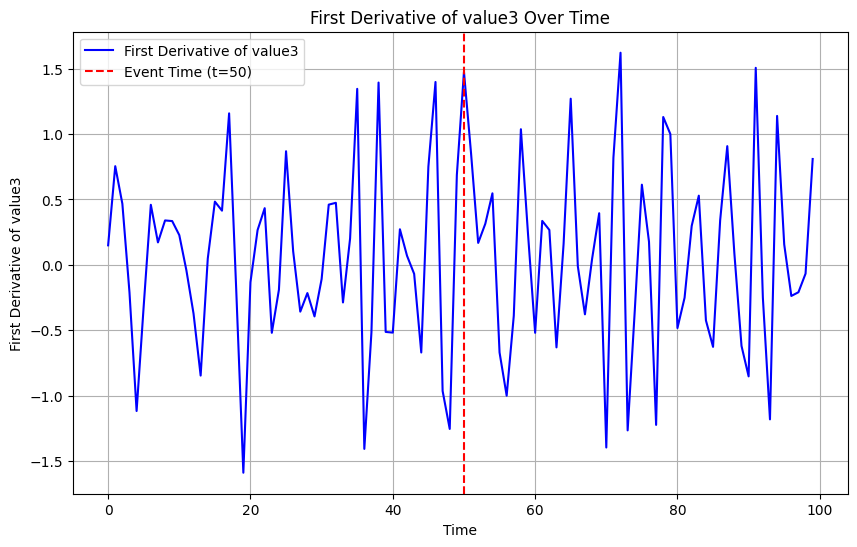

In [11]:
#Calculate the first derivative of the values
def calculate_first_derivative(df, column):
    df[f'{column}_derivative'] = np.gradient(df[column], df['time'])
    return df

for col in ['value1', 'value2', 'value3']:
    df_3_1 = calculate_first_derivative(df_3_1, col)
    
# Plotting the first derivatives
def plot_first_derivative(df, column):
    plt.figure(figsize=(10, 6))
    plt.plot(df['time'], df[f'{column}_derivative'], label=f'First Derivative of {column}', color='blue')
    plt.axvline(x=50, color='red', linestyle='--', label='Event Time (t=50)')
    plt.title(f'First Derivative of {column} Over Time')
    plt.xlabel('Time')
    plt.ylabel(f'First Derivative of {column}')
    plt.legend()
    plt.grid()
    plt.show()

for col in ['value1', 'value2', 'value3']:
    plot_first_derivative(df_3_1, col)

## Question 3-5

- Given a dataset with treatment and control data having “before” and “after” parts, apply a differences-in-differences regression.  
- Use homework_3.2.a.csv and homework_3.2.b.csv. 

In [12]:
df_3_2a = pd.read_csv('homework_3.2.a.csv')
df_3_2a = df_3_2a.rename(columns={'group1': 'group', 'time1': 'time', 'outcome1': 'outcome'})
df_3_2b = pd.read_csv('homework_3.2.b.csv')
df_3_2b = df_3_2b.rename(columns={'group2': 'group', 'time2': 'time', 'outcome2': 'outcome'})

df_3_2a['treated'] = 0  # Group 1 = control
df_3_2b['treated'] = 1  # Group 2 = treated

# Combine datasets
df_3_2 = pd.concat([df_3_2a, df_3_2b], ignore_index=True)

# Differences-in-differences regression
model = smf.ols('outcome ~ time + treated + time:treated', data=df_3_2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     247.7
Date:                Sat, 14 Jun 2025   Prob (F-statistic):          1.28e-136
Time:                        13:11:43   Log-Likelihood:                -3688.0
No. Observations:                2000   AIC:                             7384.
Df Residuals:                    1996   BIC:                             7406.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9633      0.068     14.068   

## Homework Reflection 

1. In the event study in Coding Quiz 3, how would we go about testing for a change in the second derivative as well?

The first derivative (slope) tells whether the outcome increases or decreases. The second derivative tells you whether that rate of change is speeding up, slowing down, or accelerating So, testing for a change in the second derivative asks: Did the trajectory of the outcome become more curved i.e., did the rate of increase or decrease accelerate or decelerate after the event?
To calculate, you need to find the gradient:

```python

def calculate_first_derivative(df, column):
    df[f'{column}_derivative'] = np.gradient(df[column], df['time'])
    return df

```

This finds the rate of change of the specified column with respect to time.

2. Create your own scenario that illustrates differences-in-differences. Describe the story behind the data and show whether there is a nonzero treatment effect.

DiD measures causal effects using observed before/after changes across groups. There are some basic assumptions when using DiD. The control group shows what would’ve happened to the treatment group if the treatment hadn’t occurred. No other confounding shocks affect only one group simultaneously. Groups don’t change composition over time.

Let’s take two towns, Town A and Town B. In 2023, Town A launches a free Wi-Fi program in public spaces. Town B did not. The question we want to answer is, does free Wi-Fi increase time spent online? 

| City    | Year | Wi-Fi Policy | Avg Hours Online per Day |
|---------|------|--------------|--------------------------|
| Town A  | 2022 | No           | 2.1                      |
| Town A  | 2023 | Yes          | 3.4                      |
| Town B  | 2022 | No           | 2.0                      |
| Town B  | 2023 | No           | 2.2                      |


### Calculate Before/After Changes
    Town A: 3.4 - 2.1 = +1.3
    Town B: 2.2 - 2.0 = +0.2

### DiD Estimate
    Treatment Effect = (3.4−2.1) − (2.2−2.0) = 1.3 − 0.2 = 1.1

Residents of Town A increased their average daily internet use by 1.1 more hours than Town B residents, suggesting a causal effect from the Wi-Fi policy. 

